In [1]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt
%matplotlib inline

import skimage 
from skimage import io
from skimage.color import rgb2lab

**Under water image**

Original Under water image:


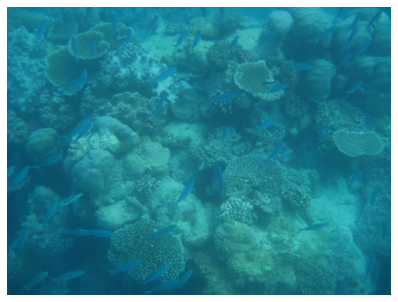

In [2]:
img = cv2.cvtColor(cv2.imread("Images/uwi.jpg"), cv2.COLOR_BGR2RGB)
print('Original Under water image:')
plt.axis('off')
imgplot = plt.imshow(img)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("Images/uwi_1.jpg", bbox_inches = 'tight',pad_inches = 0)
plt.show()

**Color channel histogram**

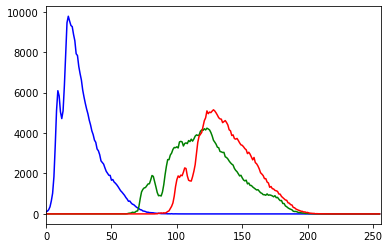

In [3]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## White Balancing Method:

Mathematically, to express the compensated red channel **Irc** at every
pixel location (x) as follows:

`Irc(x) = Ir (x) + α.(Ig' − Ir' ).(1 − Ir (x)).Ig(x)`

*   **Ir** , **Ig** represent the red and green color channels of image **I**,
  *  each channel being in the interval [0, 1], 
  *  after normalization by the upper limit of their dynamic range
*   **Ir'** and **Ig'** denote the mean value of **Ir** and **Ig**
*  **α** denotes a constant parameter.
  *  In practice, tests have revealed that a value of α = 1 is
appropriate for various illumination conditions and acquisition
settings.

Original Image


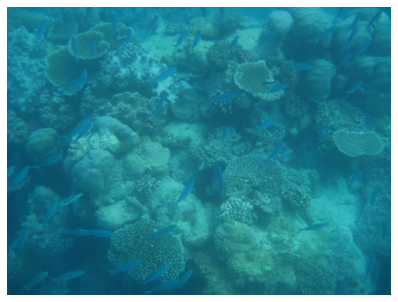

Compensated red channel


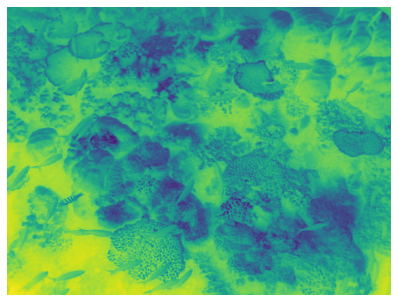

Color channel histograms of original image:


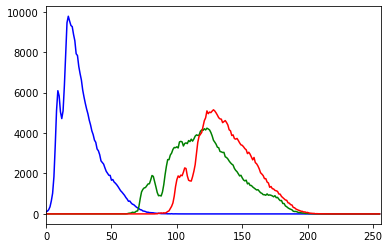

Color channel histograms of compensated image:


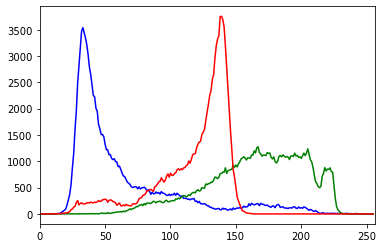

In [4]:
#  Red, blue, green channels
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

#mean of all channels
Rm=np.mean(R,axis=0)
rm1=np.mean(Rm);

Gm=np.mean(G,axis=0)
gm1=np.mean(Gm);

Bm=np.mean(B,axis=0);
bm1=np.mean(Bm);

#compensated red channel Irc at every pixel location (x)
Irc = np.double(R)+np.double((gm1-rm1))*np.double((1-rm1))*np.double(G)

#plotting

plt.axis('off')
print('Original Image')
imgplot = plt.imshow(img)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

plt.axis('off')
print('Compensated red channel')
imgplot=plt.imshow(Irc)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("Images/Irc1.jpg", bbox_inches = 'tight',pad_inches = 0)
plt.show()

print('Color channel histograms of original image:')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

print('Color channel histograms of compensated image:')
Irc1=cv2.cvtColor(cv2.imread("Images/Irc1.jpg"), cv2.COLOR_BGR2RGB)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([Irc1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Original image


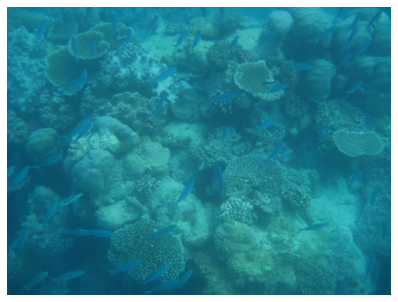

After applying DCP on our white balanced image version


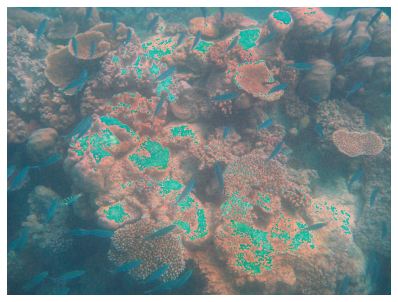

In [5]:
print('Original image')
plt.axis('off')
input1= cv2.cvtColor(cv2.imread("Images/uwi.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(input1)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

dim = np.shape(input1)[2];
input1 = np.array(input1,dtype='uint8')
output = np.zeros(np.shape(input1))
if(dim==1 or dim==3):
    for j in range(0,dim):
        value1 = np.sum(np.sum(input1[:,:,j],axis=0),axis=0)
        value2 = np.size(input1[:,:,j])
        scalVal=value1/value2;
        sai=(127/scalVal);
        output[:,:,j]=input1[:,:,j]*sai;
    output = np.array(output,dtype='uint8');
        
    # DCP : dark channel prior
    print('After applying DCP on our white balanced image version')
    imgplot=plt.imshow(output)
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig('Images/DCP1.jpg', bbox_inches='tight',pad_inches = 0)
    plt.show()
        
else:
        print('myApp:argChk','Input error. Matrix dimensions do not fit.')

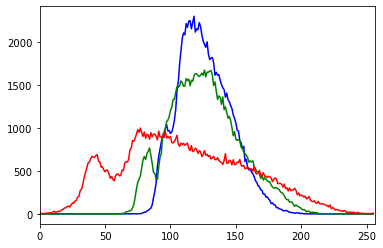

In [6]:
dcpi = cv2.imread('Images/DCP1.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([dcpi],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

After Gamma correction:-


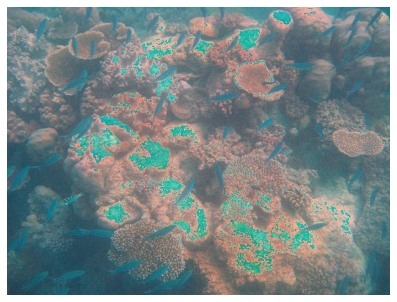

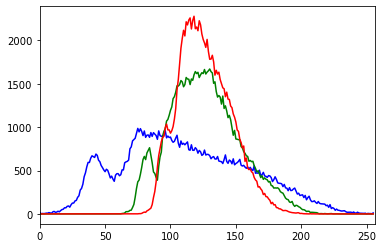

In [7]:
# Gamma Correction

# Open the image. 
img = cv2.cvtColor(cv2.imread('Images/DCP1.jpg'), cv2.COLOR_BGR2RGB)

# Trying gamma values.
gamma = 1.0

# Apply gamma correction. 
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

print('After Gamma correction:-')
plt.axis('off')
imgplot=plt.imshow(gamma_corrected)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('Images/gamma_corrected1.jpg', bbox_inches='tight',pad_inches = 0)
plt.show()

gci = cv2.cvtColor(cv2.imread('Images/gamma_corrected1.jpg'), cv2.COLOR_BGR2RGB)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([gci],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

After Sharpening correction:


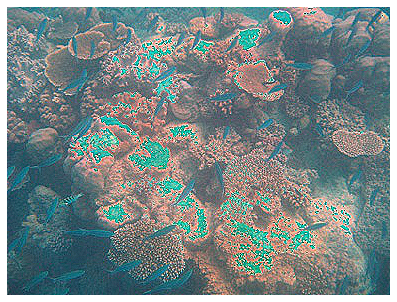

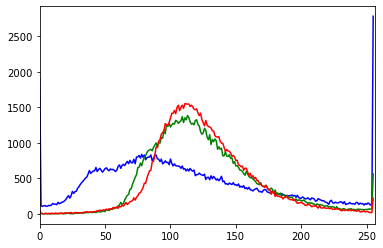

In [8]:
#Image Sharpening

img = cv2.cvtColor(cv2.imread('Images/DCP1.jpg'), cv2.COLOR_BGR2RGB)
filter1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharpen_img = cv2.filter2D(img,-1,filter1)

# [[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]
# sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# sharped_img = cv2.filter2D(image, -1, sharpen_filter)

print('After Sharpening correction:')
imgplot=plt.imshow(sharpen_img)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('Images/sharpen_img1.jpg', bbox_inches='tight',pad_inches = 0)
plt.show()

img = cv2.cvtColor(cv2.imread('Images/sharpen_img1.jpg'), cv2.COLOR_BGR2RGB)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Multi Scale Fusion can be applied on the images as follows:


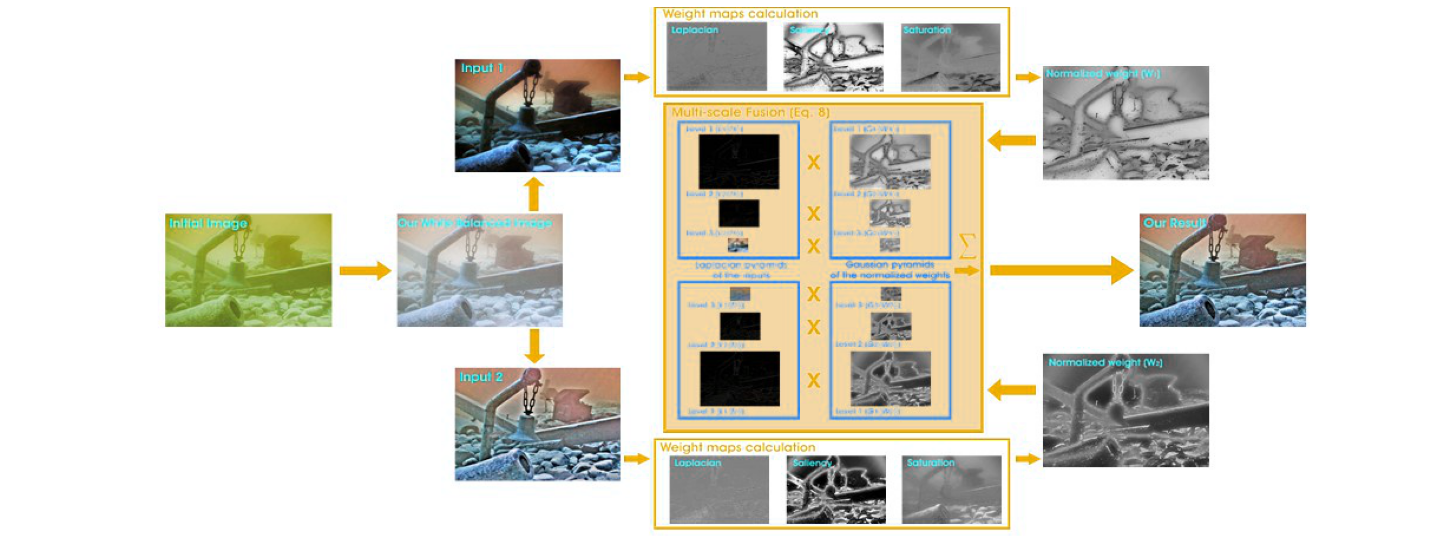

In [9]:
## Below is the image of How Multi Scale Fusion can be applied on the images.
# By using of the various Filters
img = cv2.imread("Images\MSF.jpg")

print('Multi Scale Fusion can be applied on the images as follows:')
plt.figure(figsize=(30,10))
plt.axis('off')
plt.imshow(img)
plt.show()

In [10]:
# [laplacian]
# Apply Laplace function
#Laplacian Contrast Weight

img = cv2.cvtColor(cv2.imread('Images/sharpen_img1.jpg'), cv2.COLOR_BGR2RGB)

def laplace_contrast_weight(src_gray):
    WL1= cv2.Laplacian(src_gray,cv2.CV_64F)
    abs_dst = cv2.convertScaleAbs(WL1)
    return abs_dst
out = laplace_contrast_weight(img)
print(out)

[[[ 14  40  28]
  [ 37  31   2]
  [135  13  50]
  ...
  [ 55 146 169]
  [ 90  99  34]
  [ 10  62  98]]

 [[ 51  23  31]
  [  7  24  13]
  [ 47  14   3]
  ...
  [ 28  70  74]
  [ 45  45  60]
  [ 57   1   9]]

 [[  3  22  12]
  [ 47   1  13]
  [105   6  39]
  ...
  [ 37 117 129]
  [ 58  54  60]
  [ 10  88 100]]

 ...

 [[ 90  61  66]
  [ 25  26  25]
  [ 32  16  22]
  ...
  [ 24   1   8]
  [ 41  23  28]
  [ 35   2   1]]

 [[101 108 101]
  [ 33  35  34]
  [ 19  21  21]
  ...
  [ 10  11  13]
  [ 57  62  62]
  [ 64  65  53]]

 [[ 36  70  54]
  [121 126 124]
  [ 45   7  20]
  ...
  [ 49   8  22]
  [ 34   9  19]
  [ 52  88  64]]]


In [11]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def saliency_detection(img):
    kernel= np.array(matlab_style_gauss2D((3,3),1))
    gfrgb= cv2.filter2D(img,-1,kernel,cv2.BORDER_WRAP)
    lab= rgb2lab(gfrgb)
    l = np.double(lab[:,:,0])
    a = np.double(lab[:,:,1])
    b = np.double(lab[:,:,2])
    lm = np.mean(np.mean(l))
    am = np.mean(np.mean(a))
    bm = np.mean(np.mean(b))
    sm = np.square(l-lm)+ np.square(a-am) + np.square((b-bm))
    return sm


In [12]:
def iexpand(image):
    out = None
    h= np.array([1,4,6,4,1])/16
    filt= (h.T).dot(h)
    outimage = np.zeros((image.shape[0]*2, image.shape[1]*2), dtype=np.float64)
    outimage[::2,::2]=image[:,:]
    out = cv2.filter2D(outimage,cv2.CV_64F,filt)
    return out

def ireduce(image):
    out = None
    h= np.array([1,4,6,4,1])/16
    filt= (h.T).dot(h)
    outimage = cv2.filter2D(image,cv2.CV_64F,filt)
    out = outimage[::2,::2]
    return out
 
'''create a gaussain pyramid of a given image'''
def gaussian_pyramid(image, levels):
    output = []
    output.append(image)
    tmp = image
    for i in range(0,levels):
        tmp = ireduce(tmp)
        output.append(tmp)
    return output
 
'''build a laplacian pyramid'''
def lapl_pyramid(gauss_pyr):
    output = []
    k = len(gauss_pyr)
    for i in range(0,k-1):
        gu = gauss_pyr[i]
        egu = iexpand(gauss_pyr[i+1])
        if egu.shape[0] > gu.shape[0]:
           egu = np.delete(egu,(-1),axis=0)
        if egu.shape[1] > gu.shape[1]:
          egu = np.delete(egu,(-1),axis=1)
        output.append(gu - egu)
    output.append(gauss_pyr.pop())
    return output


In [13]:
'''Blend the two laplacian pyramids by weighting them according to the mask.'''

def blend(lapl_pyr_white, lapl_pyr_black, gauss_pyr_mask):
    blended_pyr = []
    k= len(gauss_pyr_mask)
    for i in range(0,k):
        p1= gauss_pyr_mask[i]*lapl_pyr_white[i]
        p2=(1 - gauss_pyr_mask[i])*lapl_pyr_black[i]
        blended_pyr.append(p1 + p2)
    return blended_pyr

'''Reconstruct the image based on its laplacian pyramid.'''
def collapse(lapl_pyr):
    output = None
    output = np.zeros((lapl_pyr[0].shape[0],lapl_pyr[0].shape[1]), dtype=np.float64)
    for i in range(len(lapl_pyr)-1,0,-1):
        lap = iexpand(lapl_pyr[i])
        lapb = lapl_pyr[i-1]
        if lap.shape[0] > lapb.shape[0]:
          lap = np.delete(lap,(-1),axis=0)
        if lap.shape[1] > lapb.shape[1]:
          lap = np.delete(lap,(-1),axis=1)
        tmp = lap + lapb
    output = tmp
    return output

In [14]:
def split_rgb(image):
    red = None
    green = None
    blue = None
    (blue, green, red) = cv2.split(image)
    return red, green, blue

<ipython-input-15-3d14b2c57271>:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R_r = np.array(Weight1)* r1 + np.array(Weight2) * r2
<ipython-input-15-3d14b2c57271>:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R_g = np.array(Weight1)* g1 + np.array(Weight2) * g2
<ipython-input-15-3d14b2c57271>:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creati

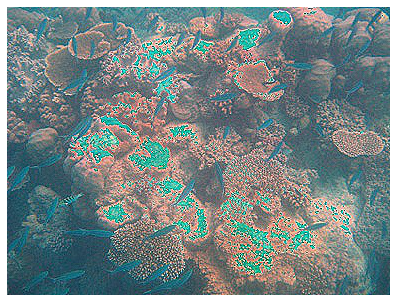

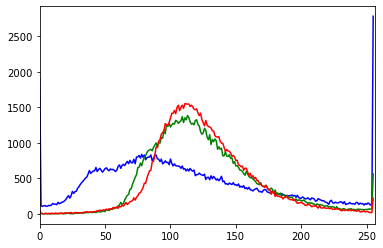

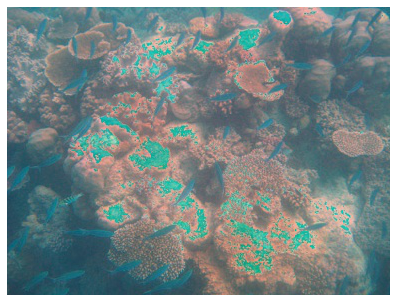

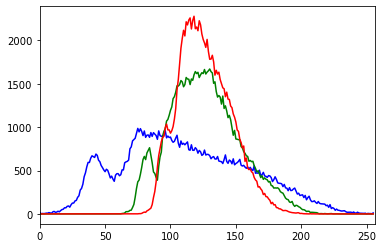

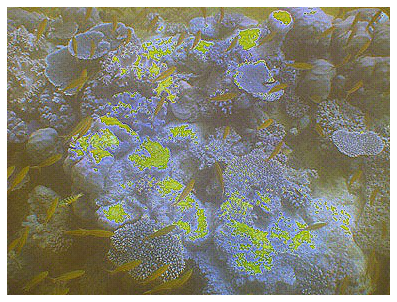

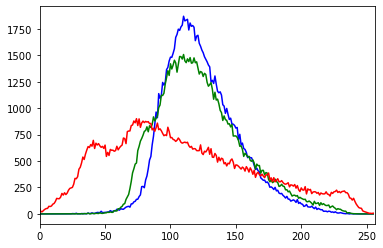

In [15]:
img = cv2.cvtColor(cv2.imread('Images/gamma_corrected1.jpg'), cv2.COLOR_BGR2RGB);
im=cv2.cvtColor(cv2.imread('Images/sharpen_img1.jpg'), cv2.COLOR_BGR2RGB);
img1=np.array(img,dtype='uint8');
lab1=np.array(img,dtype='uint8');

img2=np.array(im,dtype='uint8');
lab2 = img2;
R1 = np.double(lab1[:,:,0])/255
R2 = np.double(lab2[:,:,0])/255

WL1= laplace_contrast_weight(R1)
WL2= laplace_contrast_weight(R2)

WS1= saliency_detection(img1)
WS2= saliency_detection(im)

sigma= 0.25
aver= 0.5
WE1= np.exp(-(R1-aver)**2/(2*np.square(sigma)))
WE2= np.exp(-(R2-aver)**2/(2*np.square(sigma)))

W1 = (WL1 + WS1 + WE1)/(WL1 + WS1 + WE1 + WL2 + WS2 + WE2)
W2 = (WL2 + WS2 + WE2)/(WL1 + WS1 + WE1 + WL2 + WS2 + WE2)

Weight1= gaussian_pyramid(W1,5)
Weight2= gaussian_pyramid(W2,5)

R1= None
G1= None
B1= None
R2= None
G2= None
B2= None

R_b= []
(R1,G1,B1)= split_rgb(img1)
(R2,G2,B2)= split_rgb(img2)



depth=5 
gauss_pyr_image1r = gaussian_pyramid(R1, depth)
gauss_pyr_image1g = gaussian_pyramid(G1, depth)
gauss_pyr_image1b = gaussian_pyramid(B1, depth)
 
gauss_pyr_image2r = gaussian_pyramid(R2, depth)
gauss_pyr_image2g = gaussian_pyramid(G2, depth)
gauss_pyr_image2b = gaussian_pyramid(B2, depth)

#calculate the laplacian pyramid
#input1
level=5
r1  = lapl_pyramid(gauss_pyr_image1r)
g1  = lapl_pyramid(gauss_pyr_image1g)
b1  = lapl_pyramid(gauss_pyr_image1b)
 
r2 = lapl_pyramid(gauss_pyr_image2r)
g2 = lapl_pyramid(gauss_pyr_image2g)
b2 = lapl_pyramid(gauss_pyr_image2b)

R_r = np.array(Weight1)* r1 + np.array(Weight2) * r2
R_g = np.array(Weight1)* g1 + np.array(Weight2) * g2
R_b = np.array(Weight1)* b1 + np.array(Weight2) * b2

R= collapse(R_r)
G= collapse(R_g)
B= collapse(R_b)


R[R < 0] = 0
R[R > 255] = 255
R = R.astype(np.uint8)
 
G[G < 0] = 0
G[G > 255] = 255
G = G.astype(np.uint8)
 
B[B < 0] = 0
B[B > 255] = 255
B = B.astype(np.uint8)
result = np.zeros(img.shape,dtype=img.dtype)
tmp = []
tmp.append(R)
tmp.append(G)
tmp.append(B)
result = cv2.merge(tmp,result)

plt.axis('off')
plt.imshow(lab2)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([lab2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

plt.axis('off')
plt.imshow(lab1)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([lab1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

plt.axis('off')
plt.imshow(result)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("Images/result.jpg", bbox_inches = 'tight',pad_inches = 0)
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([result],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


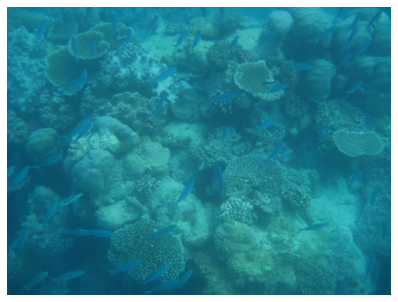

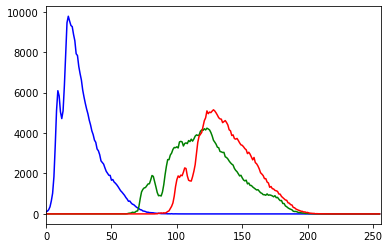

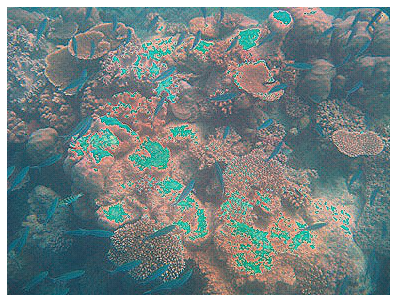

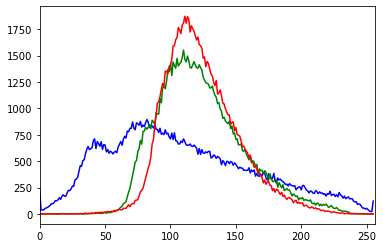

In [16]:
_img=cv2.cvtColor(cv2.imread("Images/uwi.jpg"), cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(_img)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

result=cv2.imread("Images/result.jpg")
plt.axis('off')
plt.imshow(result)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([result],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()